In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
train_ds = pd.read_csv('train.csv')

In [3]:
train_ds.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = train_ds.label

In [5]:
labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
img = train_ds.drop(labels='label' ,axis=1)

In [7]:
img.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = img.to_numpy()
Y = labels.to_numpy()

In [9]:
import matplotlib.pyplot as plt

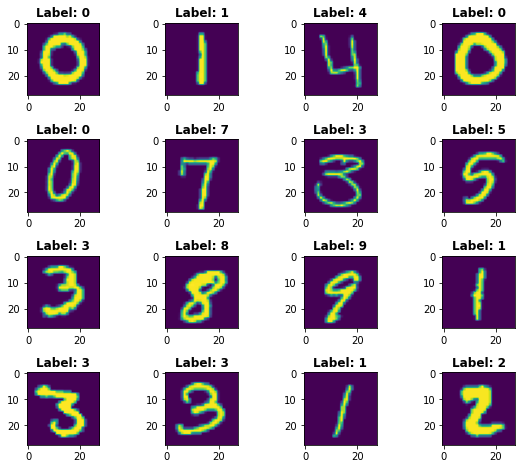

In [10]:
# img shape = 28x28x1
columns = 4
rows = 5
fig = plt.figure(figsize=(8, 8))

for index in range(1, 17):
    fig.add_subplot(rows, columns, index).set_title("Label: " + str(Y[index]), fontweight='bold')
    plt.tight_layout()
    plt.imshow(X[index].reshape(28, 28))


In [11]:
# reshape X to (m, 28, 28), and Y to (m, 1)

X = X.reshape(X.shape[0], 28, 28, 1)
Y = Y.reshape(Y.shape[0], 1)

In [18]:
Y_onehot = np.zeros((int(Y.size), int(Y.max()) + 1))
Y_onehot[np.arange(Y.size), Y.astype(int)] = 1
print(Y_onehot.T.shape)

(10, 42000)


In [19]:
Y_onehot = Y_onehot.T

In [12]:
# split train and test size about 5%

split_size = 0.05

X_test = X[0: int(X.shape[0]*split_size),:,:]
Y_test = Y[0: int(Y.shape[0]*split_size)]

X_train = X[int(X.shape[0]*split_size): X.shape[0], :,:]
Y_train = Y[int(Y.shape[0]*split_size): Y.shape[0]]

print("X original size: {}, Y original Sizee: {} \n"
      "Train: X --> {} Y --> {} \nTest:  X --> {} "
      " Y --> {} \n".format(X.shape, Y.shape, X_train.shape, 
                           Y_train.shape, X_test.shape, Y_test.shape))

X original size: (42000, 28, 28, 1), Y original Sizee: (42000, 1) 
Train: X --> (39900, 28, 28, 1) Y --> (39900, 1) 
Test:  X --> (2100, 28, 28, 1)  Y --> (2100, 1) 



In [13]:
from resnet import resnet18
import tensorflow as tf

In [14]:
hyperparameters = {
    "lr":0.01,
    "batch_size":256,
    "num_epoch": 20
    
}

In [17]:

model = resnet18(X.shape[1:])
optimizer = tf.keras.optimizers.Adam(lr= hyperparameters["lr"])
model.compile(loss = 'binary_crossentropy',
         optimizer = optimizer,
         metrics = ['acc'])



#learning rate decay
def lr_decay(epoch, lr):
    if epoch != 0:
        if epoch%5 == 0:
            lr = lr/5
            print('Epoch: {} e Lr: {}'. format(epoch, lr))
        else:
            lr
            print('Epoch: {} e Lr: {}'. format(epoch, lr))
    else:
        print('Epoch: {} e Lr: {}'. format(epoch, lr))
    return lr

lr_schedule_decay = tf.keras.callbacks.LearningRateScheduler(
    lr_decay)



#treinamento do modelo
history = model.fit(X, Y, batch_size=hyperparameters["batch_size"],
                     epochs = hyperparameters["num_epoch"],
                     callbacks = [lr_schedule_decay],
                     verbose = 1,
                  )

2021-08-03 20:03:54.022012: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/ymquint/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-08-03 20:03:55.030140: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
Epoch: 0 e Lr: 0.009999999776482582
165/165 [==============================] - 754s 5s/step - loss: -19200.5273 - acc: 0.1111
Epoch 2/20
Epoch: 1 e Lr: 0.009999999776482582
 32/165 [====>.........................] - ETA: 8:22:48 - loss: -74485.2344 - acc: 0.1095

KeyboardInterrupt: 

In [16]:
X.shape[1:]

(28, 28, 1)